In [2]:
%matplotlib inline
import geopandas as gpd

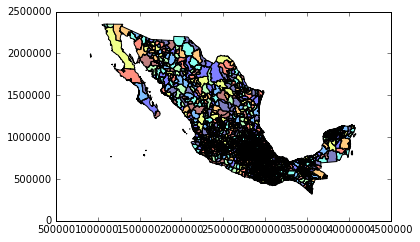

In [29]:
munmx = gpd.read_file("muni.shp")

In [6]:
munmx.set_index(munmx["CVEGEO"].astype(int), inplace = True)
munmx.head(5)

,AREA,COV_,COV_ID,CVEGEO,CVE_CAB,CVE_ENT,CVE_MUN,NOM_CAB,NOM_ENT,NOM_MUN,PERIMETER,geometry
CVEGEO,,,,,,,,,,,,
1002,54337.426563,0.0,1.0,01002,0001,01,002,Asientos,Aguascalientes,Asientos,192096.427893,"POLYGON ((2500060.239199999 1133299.9901, 2500..."
1011,13777.017689,1.0,2.0,01011,0001,01,011,San Francisco de los Romo,Aguascalientes,San Francisco de los Romo,103689.065058,"POLYGON ((2485534.556000002 1117425.794000002,..."
1007,37229.516172,2.0,3.0,01007,0001,01,007,RincÃ³n de Romos,Aguascalientes,RincÃ³n de Romos,161749.880103,"POLYGON ((2480633.530000007 1149057.668199996,..."
1008,85779.057493,3.0,4.0,01008,0001,01,008,San JosÃ© de Gracia,Aguascalientes,San JosÃ© de Gracia,181537.600406,"POLYGON ((2463679.819099998 1122454.043300003,..."
1005,49989.510265,4.0,5.0,01005,0001,01,005,JesÃºs MarÃ­a,Aguascalientes,JesÃºs MarÃ­a,163500.813411,"POLYGON ((2468125.583600003 1113246.7959, 2468..."


{'datum': 'WGS84', 'y_0': 0, 'lat_1': 17.5, 'lat_0': 12, 'proj': 'lcc', 'units': 'm', 'lat_2': 29.5, 'lon_0': -102, 'no_defs': True, 'x_0': 2500000}


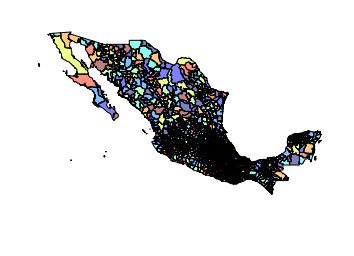

In [8]:
print(munmx.crs)
# Lambert conformal conic projection WGS84 is epsg =4326
ax = munmx.to_crs(epsg=4326).plot()
ax.set_axis_off()

In [117]:
import pandas as pd
hom_3x1 = pd.read_csv("total_hom_3x1.csv", index_col = "id")
hom_3x1.index.names = ['CVEGEO'] #potential problem with the id number, is not a string
hom_3x1.rename(columns = {"hom_rate 13" : "Homicide Rate in 2013", 
                          "hom_rate 14" : "Homicide Rate in 2014", 
                          "Total 3x1 2013" : "Projects granted in 2013", 
                          "Total 3x1 2014" : "Projects granted in 2014", 
                         "ENTIDAD": "State",
                         "MUNICIPIO" : "Municipality"}, inplace = True)
hom_3x1.head(10)

,Unnamed: 0,State,Municipality,Homicide Rate in 2013,Projects granted in 2013,Homicide Rate in 2014,Projects granted in 2014
CVEGEO,,,,,,,
1001.0,0,AGUASCALIENTES,AGUASCALIENTES,2.383910,6.0,3.889537,6
1002.0,1,AGUASCALIENTES,ASIENTOS,10.990943,2.0,0.000000,9
1003.0,2,AGUASCALIENTES,CALVILLO,0.000000,17.0,3.694399,10
1004.0,3,AGUASCALIENTES,COSIO,0.000000,2.0,0.000000,5
1006.0,4,AGUASCALIENTES,PABELLON DE ARTEAGA,2.388801,1.0,6.024701,2
1007.0,5,AGUASCALIENTES,RINCON DE ROMOS,4.068679,2.0,0.000000,1
1008.0,6,AGUASCALIENTES,SAN JOSE DE GRACIA,0.000000,4.0,2.034340,3
1009.0,7,AGUASCALIENTES,TEPEZALA,0.000000,1.0,0.000000,3
2001.0,8,BAJA CALIFORNIA,ENSENADA,10.282468,1.0,0.000000,4


In [116]:
geo_hom_3x1 = munmx.join(hom_3x1, how= "outer") #outer will keep the geometry of all the municipalities

In [108]:
geo_hom_3x1.tail(10)

,AREA,COV_,COV_ID,CVE_CAB,CVE_ENT,CVE_MUN,NOM_CAB,NOM_ENT,NOM_MUN,PERIMETER,geometry,Unnamed: 0,State,Municipality,Homicide Rate in 2013,Projects granted in 2013,Homicide Rate in 2014,Projects granted in 2014
CVEGEO,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601.0,NaN,NaN,NaN,NaN,0.000000,1.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602.0,NaN,NaN,NaN,NaN,0.000000,7.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603.0,NaN,NaN,NaN,NaN,0.000000,7.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604.0,NaN,NaN,NaN,NaN,3.922645,3.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.0,NaN,NaN,NaN,NaN,30.009303,24.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606.0,NaN,NaN,NaN,NaN,0.000000,6.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,607.0,NaN,NaN,NaN,NaN,0.000000,3.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,608.0,NaN,NaN,NaN,NaN,0.000000,1.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609.0,NaN,NaN,NaN,NaN,6.803878,10.0


In [107]:
#geo_hom_3x1["id"] = geo_hom_3x1["CVEGEO"].str.lower()
#counties = counties[counties["STATEFP"] == "42"].set_index("lname")
ags = geo_hom_3x1[geo_hom_3x1["CVE_ENT"] == "01"].set_index("CVEGEO", inplace= True)

KeyError: 'CVEGEO'

In [ ]:
ft = "Homicide Rate in 2013"
ax = ags.to_crs(epsg = 4326).plot(scheme = "EQUAL_INTERVAL", k = 5, column = ft, 
                                     figsize = (16, 10), legend = True, cmap = "rainbow")

ax.set_axis_off()

In [73]:
import pysal as ps
import folium
import matplotlib.pyplot as plt

m = folium.Map([29.5, -102], 
               tiles='cartodbpositron', 
               zoom_start = 4, min_zoom = 4)

with open('census.geojson', 'w') as f: f.write(geo_hom_3x1.to_json())

ft = "Homicide Rate in 2013"
threshold_scale = list(ps.esda.mapclassify.Quantiles(geo_hom_3x1[ft], k = 5).bins)
threshold_scale = [geo_hom_3x1[ft].min()] + threshold_scale[:-1] + [0.1 + geo_hom_3x1[ft].max()]

m.choropleth(geo_path = "census.geojson", 
             data = geo_hom_3x1, 
             columns = ['CVEGEO', 'Homicide Rate in 2013'],
             threshold_scale = threshold_scale,
             key_on='feature.properties.CVEGEO',
             fill_opacity = 0.7, line_opacity=0.5,
             fill_color = 'YlGn',
             legend_name='Homicide Rate in 2013')

m.save("mx.html")
m